# Multiple Linear Regression

This notebook builds a multiple linear regression model to predict **Academic Pressure** based on **CGPA**, **Work/Study Hours**, and **Sleep Duration**.

We will:

- Load and clean the dataset.
- Fit a regression model.
- Interpret results using **R²** and hypothesis tests.
- Visualize the model fit.


# **1.Setup**

In [31]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

print("Environment ready.")


Environment ready.


# **2.Load and Clean Data**

In [34]:
cols = ['Academic Pressure', 'CGPA', 'Work/Study Hours', 'Sleep Duration']

try:
    df = pd.read_csv('student_depression_dataset.csv')  # make sure file is in same folder
    df.columns = df.columns.str.strip()
    df = df[cols]

    # Strip quotes and whitespace from Sleep Duration
    df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.replace("'", "").str.strip()

    # Map Sleep Duration to numeric (assign np.nan for 'Others')
    sleep_map = {
        'Less than 5 hours': 5,
        '5-6 hours': 5.5,
        '7-8 hours': 7.5,
        'More than 8 hours': 9
    }
    df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)

    # Convert numeric columns
    df[['Academic Pressure', 'CGPA', 'Work/Study Hours']] = df[['Academic Pressure', 'CGPA', 'Work/Study Hours']].apply(pd.to_numeric, errors='coerce')

    # Drop rows with missing values
    df = df.dropna(subset=cols)
    
    print(f"Data loaded: {len(df)} rows.")
except FileNotFoundError:
    print("File not found.")
    df = None


Data loaded: 27883 rows.


# **3.Fit the Model**

In [35]:
if df is not None and not df.empty:
    model = smf.ols('Q("Academic Pressure") ~ CGPA + Q("Work/Study Hours") + Q("Sleep Duration")', data=df).fit()
    
    print(model.summary())
    print(f"\nR² = {model.rsquared:.3f}")
    print(f"Adjusted R² = {model.rsquared_adj:.3f}")
else:
    print("No valid data. Check previous cell.")


                              OLS Regression Results                              
Dep. Variable:     Q("Academic Pressure")   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                  0.011
Method:                     Least Squares   F-statistic:                     103.9
Date:                    Fri, 05 Dec 2025   Prob (F-statistic):           6.55e-67
Time:                            12:44:41   Log-Likelihood:                -48424.
No. Observations:                   27883   AIC:                         9.686e+04
Df Residuals:                       27879   BIC:                         9.689e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# **4.Hypothesis Testing**

In [36]:
if df is not None and not df.empty:
    rows = [f"| Model (F-test) | All coefficients = 0 | {model.f_pvalue:.3e} | {'Reject H₀ → Significant' if model.f_pvalue < 0.05 else 'Fail to reject H₀'} |"]
    
    for var, p in model.pvalues.items():
        if var != 'Intercept':
            rows.append(f"| {var} | No effect | {p:.3e} | {'Reject H₀ → Significant' if p < 0.05 else 'Fail to reject H₀'} |")
    
    table = (
        '### Null Hypotheses\n'
        '* F-test: all predictors are unrelated to `Academic Pressure`.\n'
        '* t-test: each variable has no effect when others are controlled.\n\n'
        '**Decision rule:** Reject H₀ if p-value < 0.05.\n\n'
        '| Test | Null Hypothesis | p-value | Decision |\n'
        '|------|-----------------|----------|-----------|\n' + '\n'.join(rows)
    )
    
    display(Markdown(table))


### Null Hypotheses
* F-test: all predictors are unrelated to `Academic Pressure`.
* t-test: each variable has no effect when others are controlled.

**Decision rule:** Reject H₀ if p-value < 0.05.

| Test | Null Hypothesis | p-value | Decision |
|------|-----------------|----------|-----------|
| Model (F-test) | All coefficients = 0 | 6.550e-67 | Reject H₀ → Significant |
| CGPA | No effect | 1.305e-04 | Reject H₀ → Significant |
| Q("Work/Study Hours") | No effect | 7.169e-57 | Reject H₀ → Significant |
| Q("Sleep Duration") | No effect | 8.388e-10 | Reject H₀ → Significant |

# **5.Visualization**

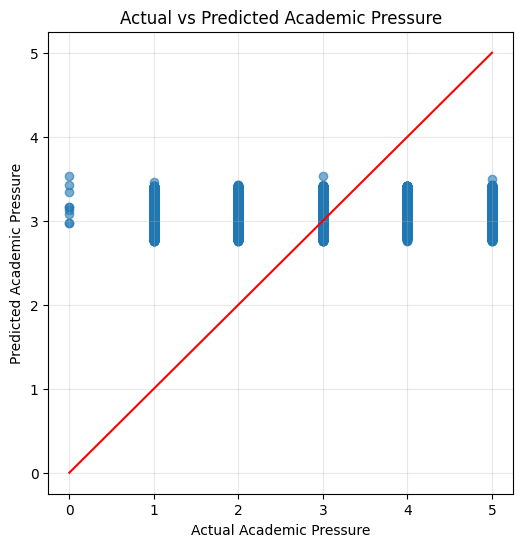

In [37]:
if df is not None and not df.empty:
    df['Predicted'] = model.fittedvalues
    
    plt.figure(figsize=(6,6))
    plt.scatter(df['Academic Pressure'], df['Predicted'], alpha=0.6)
    plt.plot([df['Academic Pressure'].min(), df['Academic Pressure'].max()],
             [df['Academic Pressure'].min(), df['Academic Pressure'].max()], color='red')
    plt.title('Actual vs Predicted Academic Pressure')
    plt.xlabel('Actual Academic Pressure')
    plt.ylabel('Predicted Academic Pressure')
    plt.grid(alpha=0.3)
    plt.show()


# Interpretation Summary

1.**R²** and **Adjusted R²** indicate how well the model explains variability.  
2.A **significant F-test** means the model as a whole is useful.  
3.**Significant t-tests** mean individual predictors contribute meaningfully.  
4.The **scatter plot** should show points close to the diagonal line if predictions are accurate.

